### Tutorial on Portfolio Optimization 

#### Modern Portfolio Theory (MPT)
##### A ground breaking research in the field of economic and finance in the year 1952 proposed by Harry Markowitz’s. It was proposed to  get an idea on how to select your portfolio which can give you maximum return with the given level of risk. 
##### One of the important idea about MPT was instead of calculating individual risk and return of the assets. Its better to see the overall perfomrnace of a portfolio. 
 ***The assumptions of MPT, thus, emphasise that investors only assume additional risk when there is a possibility of higher expected returns — “High risk, High Reward”***





####################################################################################################
##### In this program we have used quandl to get the actual price of the share. But used random weights to optimize our portfolio. 
##### if you dont want to opt for quandl and keep things little bit simple, then you can intialize the assests in the portfolio randomly. 


                                # step wise explaination

##### 1. Import all the required libraries. Quandl is the new library to be installed 
##### 2. To install qundle  :- pip install quandl (for python),  conda install -c anaconda quandl (for anaconda users)
##### 3. After installing quandl, register with the website  https://www.quandl.com/. To get your API key. (Beware of the volume limit)
##### 4. Here we used fivethirtyeight styling for plot, It is a website which used a different plotting style. 
##### 5. While config the api for quandl "Insert your api key".
##### 6. After collecting data, rearrange the data with respect to tickers. 
##### 7. Plot the price with respect to the time from line 
##### 8. pct_change function from pandas will find the percenatge change in the data over the time period.
##### 9. Function random_weights will generate the random weights for each assest which is sum upto 1. assuming our overall alloted budget. For the portfolio is one. 
##### 10. Function portfolio_annualised_performance will calulate the annual mean and standard deviation for the given portfolio with the set of weights 
##### 11. will call the above function for q times.
##### 12. After calculation the overall min and standard deviation for q portfolios, we can plot it to the see the volatility 


###############################################################################



# markowitz portfolio management



In [6]:

%matplotlib inline
!pip install quandl # for installing the library

# importing of libraries 
import pandas as pd  
import numpy as np
import matplotlib.pyplot as plt
import quandl


Please see https://github.com/pypa/pip/issues/5599 for advice on fixing the underlying issue.
To avoid this problem you can invoke Python with '-m pip' instead of running pip directly.
ERROR: Invalid requirement: '#'
You should consider upgrading via the 'C:\ProgramData\Anaconda3\python.exe -m pip install --upgrade pip' command.


In [3]:
# global variables 
port_returns = []
port_volatility = []
sharpe_ratio = []
stock_weights = []


In [4]:
# randomly generate weights 
def random_weights(n):
    weights = np.random.random(n)
    weights /= np.sum(weights)
    return weights

#### The portfolio annualised perfomance will consider different sets of randomly generated weights calculate the mean, standar deviation, sharpe ratio of the portfolio annually 

In [5]:

def portfolio_annualised_performance(weights, mean_returns, cov_matrix):
    global trade_days 

    returns = np.sum(mean_returns*weights ) *trade_days
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(trade_days)
    sharpe = returns / std
    sharpe_ratio.append(sharpe)
    port_returns.append(returns)
    port_volatility.append(std)
    stock_weights.append(weights)

#### After defining a function we need to collect data to do processing. For that we will use quandl 


Enter the qunadl API key'5UyYes-8w4uDj-83kaFn'
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 236 entries, 0 to 235
Data columns (total 3 columns):
date         236 non-null datetime64[ns]
ticker       236 non-null object
adj_close    236 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 5.6+ KB
               AAPL     AMZN        FB    GOOGL
date                                           
2018-01-02  172.260  1189.01  181.4200  1073.21
2018-01-03  172.230  1204.20  184.6700  1091.52
2018-01-04  173.030  1209.59  184.3300  1095.76
2018-01-05  175.000  1229.14  186.8500  1110.29
2018-01-08  174.350  1246.87  188.2800  1114.21
2018-01-09  174.330  1252.70  187.8700  1112.79
2018-01-10  174.290  1254.33  187.8400  1110.14
2018-01-11  175.280  1276.68  187.7700  1111.88
2018-01-12  177.090  1305.20  179.3700  1130.65
2018-01-16  176.190  1304.86  178.3900  1130.70
2018-01-17  179.100  1295.00  177.6000  1139.10
2018-01-18  179.260  1293.32  179.8000  1135.9

Text(0, 0.5, 'daily returns')

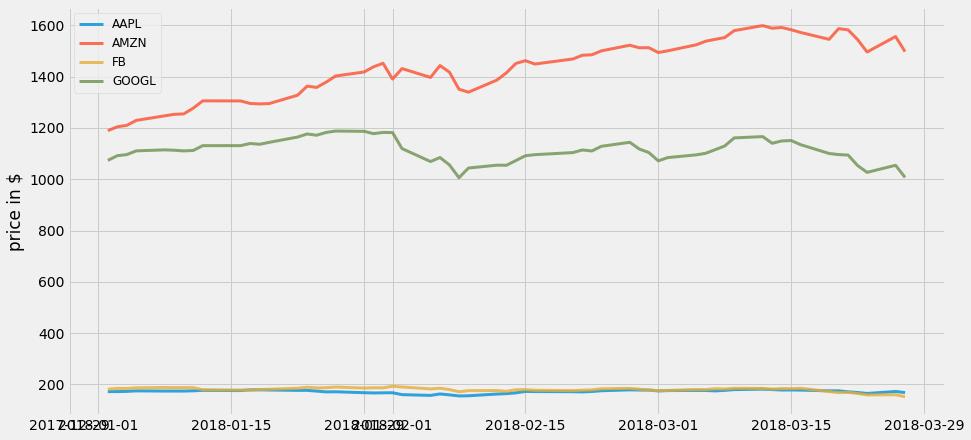

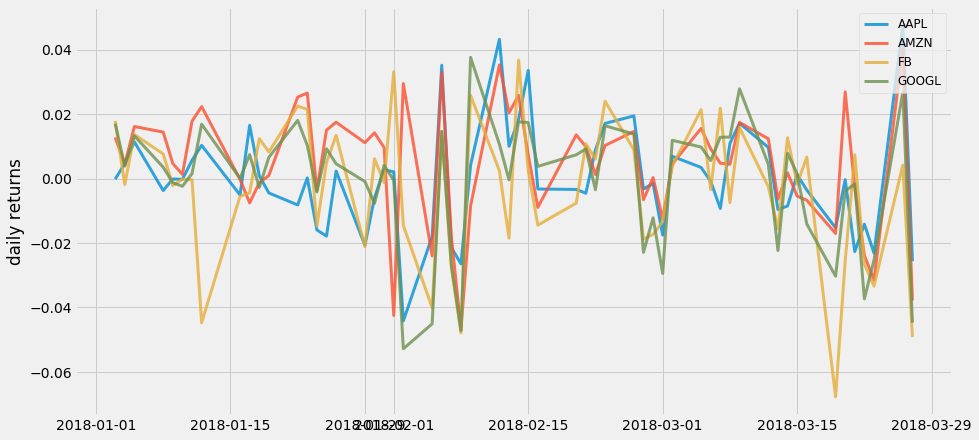

In [8]:
    your_api = input("Enter the qunadl API key" )
    plt.style.use('fivethirtyeight')
    np.random.seed(777)
    
    #%config InlineBackend.figure_format = 'retina'
    quandl.ApiConfig.api_key =  your_api
    stocks = ['AAPL','AMZN','GOOGL','FB'] # selected stocks (can update the stocks here). 
    data = quandl.get_table('WIKI/PRICES', ticker = stocks, qopts = { 'columns': ['date', 'ticker', 'adj_close'] },
    date = { 'gte': '2018-1-1', 'lte': '2019-12-31' }, paginate=True) # collected data in the stated duration of the time 
    data.head()
    data.info()
    # data consist of date, abbreviated form of the stock and closing price. 

    df = data.set_index('date')
    table = df.pivot(columns='ticker')
    # By specifying col[1] in below list comprehension
    # You can select the stock names under multi-level column
    table.columns = [col[1] for col in table.columns]
    table.head()

    print(table)
    plt.figure(figsize=(14, 7))
    for c in table.columns.values:
        plt.plot(table.index, table[c], lw=3, alpha=0.8,label=c)
    plt.legend(loc='upper left', fontsize=12)
    plt.ylabel('price in $')


    returns = table.pct_change()
    plt.figure(figsize=(14, 7))
    for c in returns.columns.values:
        plt.plot(returns.index, returns[c], lw=3, alpha=0.8,label=c)
    plt.legend(loc='upper right', fontsize=12)
    plt.ylabel('daily returns')

#### calculating the mean and covaraince on the actual price on the stock 



In [11]:

mean_returns = returns.mean() # mean for each assest 
cov_matrix = returns.cov() # covaraiance matrix for each asset 
n_portfolios = 1000 # random no of portfolios to be considered for analysis 
trade_days =252 # no of trading days in an year 
    
for i in range(n_portfolios):
    portfolio_annualised_performance(random_weights(len(stocks)),mean_returns, cov_matrix)

In [12]:

# a dictionary for Returns and Risk values of each portfolio
portfolio = {'Returns': port_returns,
             'Volatility': port_volatility,
             'Sharpe Ratio': sharpe_ratio}

In [14]:
# extend original dictionary to accomodate each ticker and weight in the portfolio
for counter,symbol in enumerate(stocks):
    portfolio[symbol+' Weight'] = [Weight[counter] for Weight in stock_weights]
    
print(portfolio)

{'Returns': [0.16089704421622328, 0.06959302643520682, 0.5265582748676324, -0.20397112075532195, 0.13764732326719428, -0.14005329009451767, 0.1633276111952483, 0.3248902764781365, 0.12960676409981225, 0.14360347175395896, 0.0013525783953354043, -0.17829884068120255, 0.2718254174104829, 0.011368828227086066, 0.4593610739282243, -0.008584583643667244, 0.015413697816952935, 0.04056337081387646, 0.2195665895151303, -0.20694074964146386, 0.12512242370878066, -0.3563688701244768, -0.08814269053583848, 0.17630799229818034, -0.18828373688414768, 0.27386512742068286, 0.08968843055003003, 0.20080738499656997, -0.12923040595647814, 0.015712779739709262, -0.04765051364463962, 0.021109377368834614, 0.5863637385847108, -0.060104489572803226, -0.26617528129195694, -0.17273273223720165, -0.12052051297247271, -0.07099132418284852, 0.16883377870546956, 0.021400639955003863, -0.25005149181670766, 0.3962638447157514, -0.17460071521249904, -0.391282810026843, 0.12187028128306582, -0.02042788611076938, -0.0

In [17]:
# make a nice dataframe of the extended dictionary
df = pd.DataFrame(portfolio)
# get better labels for desired arrangement of columns    
column_order = ['Returns', 'Volatility', 'Sharpe Ratio'] + [stock+' Weight' for stock in stocks]
df = df[column_order]

In [ ]:
# for plottin